1. What is Stable Matching?
    - One-to-one match between two sets of elements of equal size, based on the individual preferences of each member.
    - A matching is stable if there are no blocking matches.
    - Key Mathematical Properties: existence, non-uniqueness, group optimality.
    - University admissions,  firms-agents, dating apps…

2. The Algorithm: Gale-Shapley
I. The Proposal Phase:
The proposer propose to the highest-ranked person on their preference list to whom they have not yet reached out.
II. The Acceptance/Rejection Phase
The recipient evaluates the proposal based on their own ranking: 
if available – accepts proposal.
if committed – they compare the new proposer against their current partner and choose the better option.
III. The Iteration Phase
Algorithm continues until termination (no more unmatched proposers)

3. Justification
Why does this algorithm work?
    1. The algorithm always terminates and is complete, if the number of participants in each group is equal, everyone will eventually be matched.
    2. Out of all possible stable matchings, every proposer receives the best partner he can possibly have in any stable setup. Conversely, the proposed receive their "worst" stable match.
    3. The result is always stable. There will never be a pair who are not matched to each other but would both prefer each other over their actual assignments.

The purpose of the Gale-Shapley algorithm is not simply to maximize the total number of matches (which would be a Maximum Matching), but to guarantee stability.

4. Python Implementation

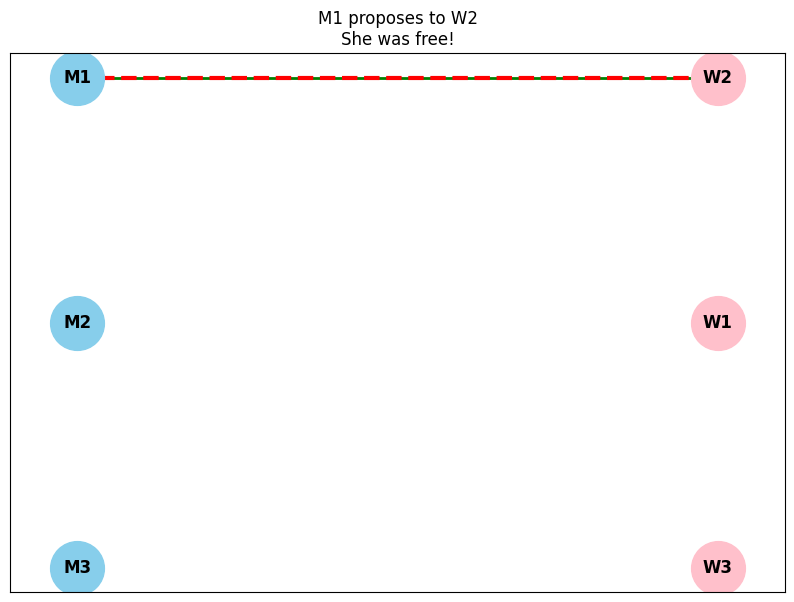

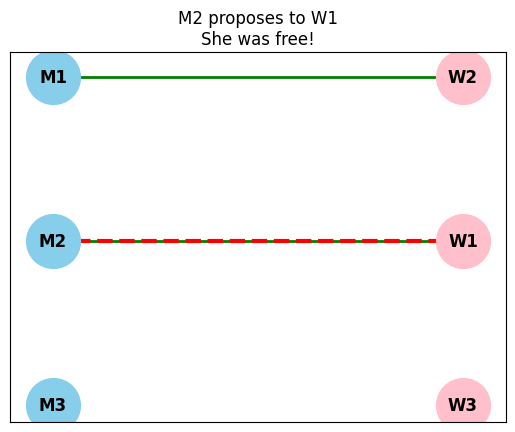

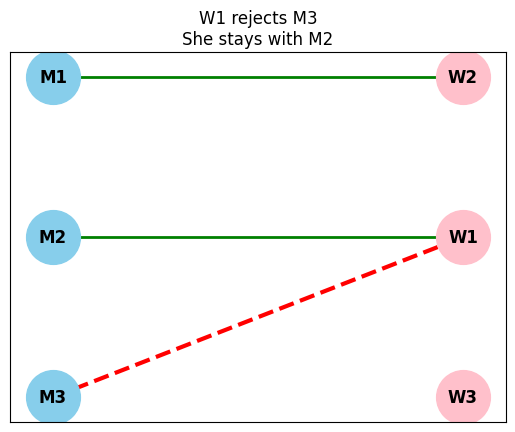

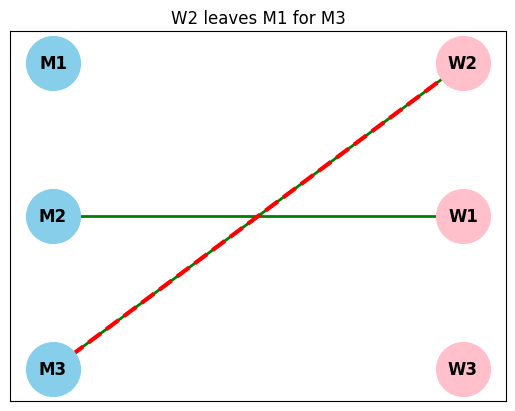

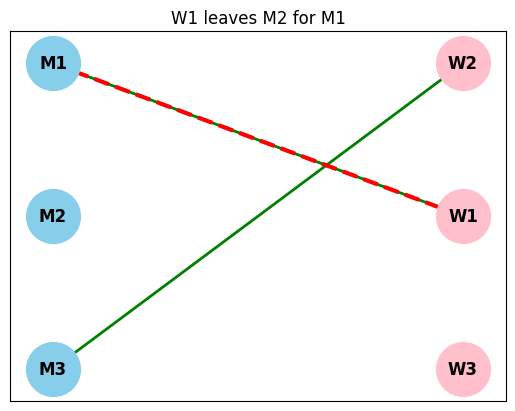

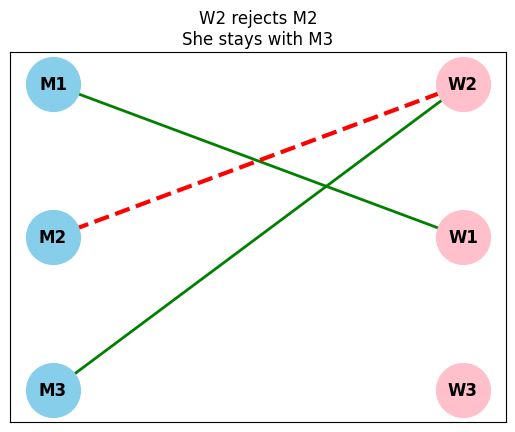

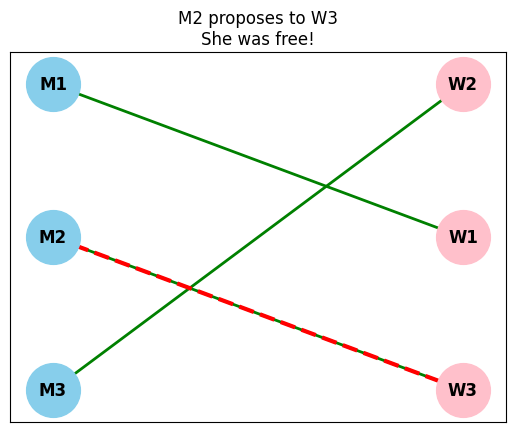

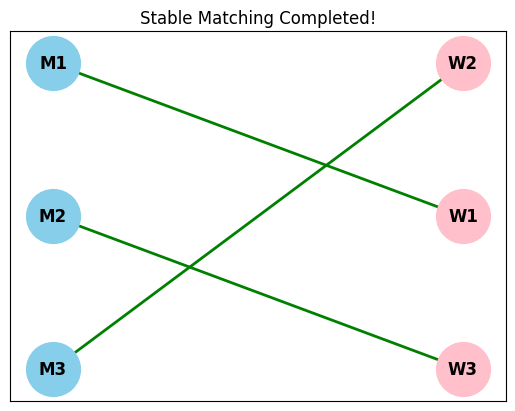

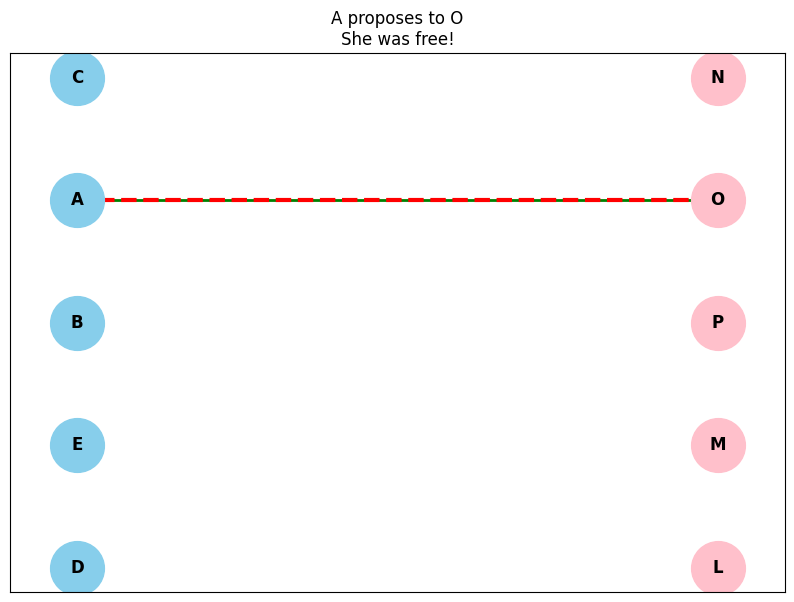

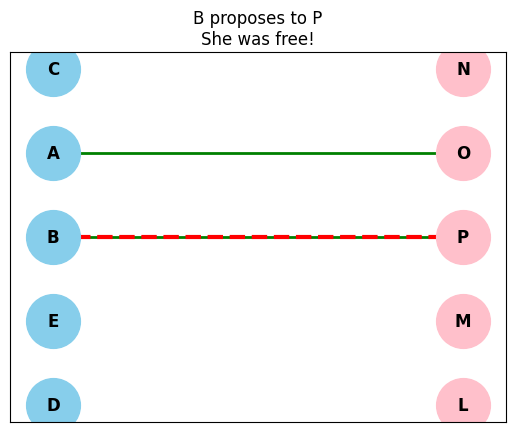

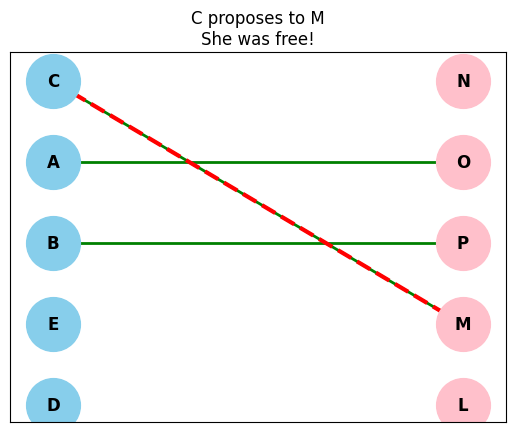

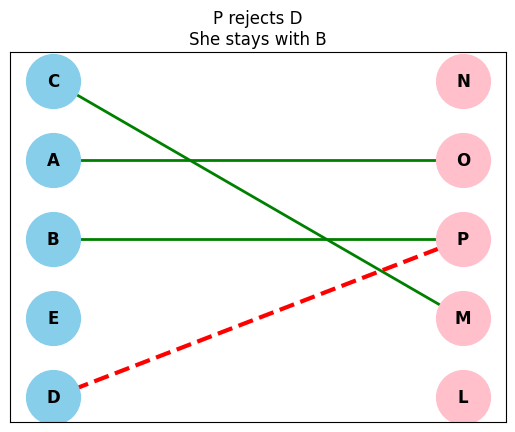

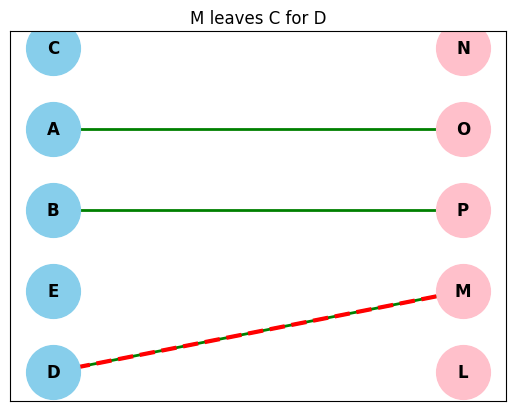

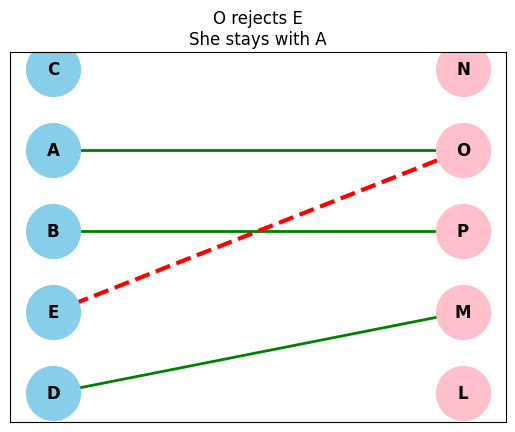

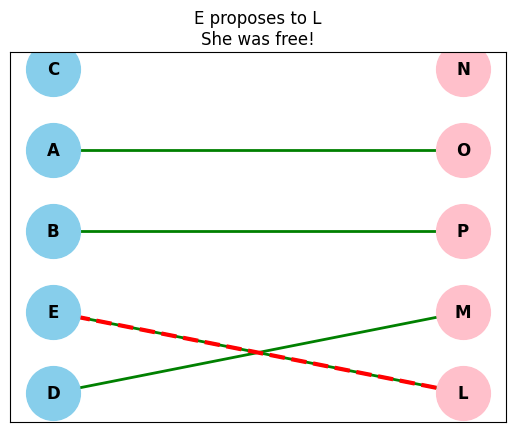

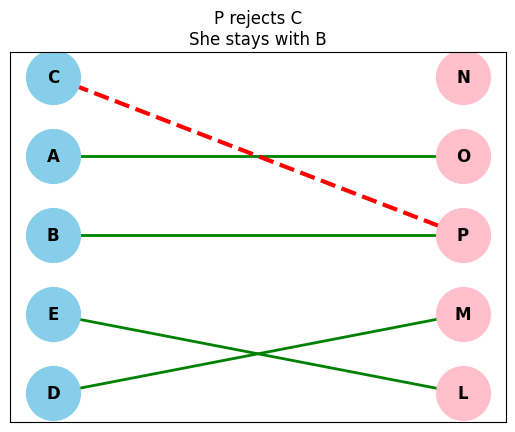

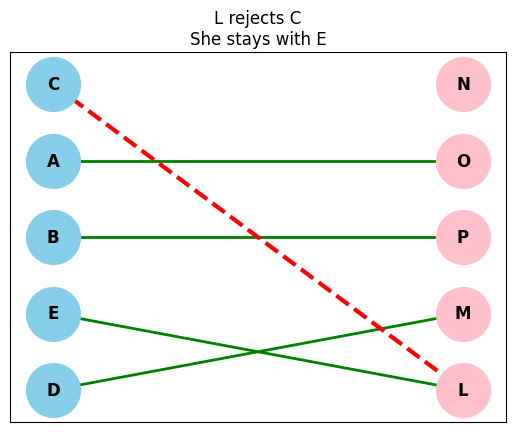

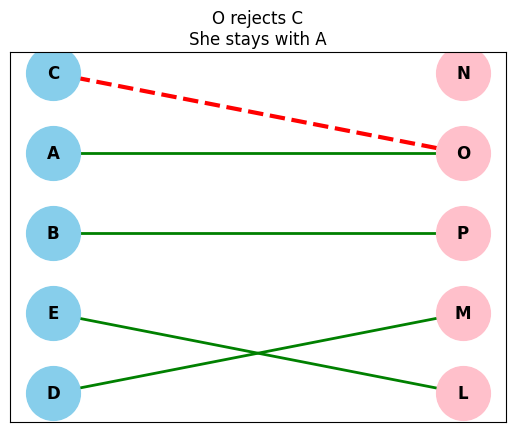

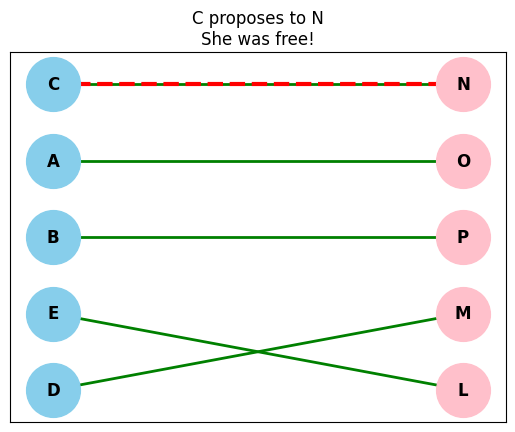

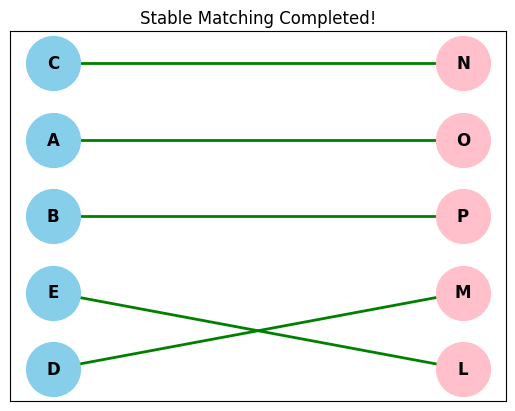

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_step(men, women, current_pairs, step_title, proposer=None, target=None, rejected=None):
    plt.clf()  # Clear the current figure
    G = nx.Graph()
    G.add_nodes_from(men, bipartite=0)
    G.add_nodes_from(women, bipartite=1)

    # Current matching edges (in green)
    for w, m in current_pairs.items():
        G.add_edge(m, w, color='green', style='solid')

    pos = nx.bipartite_layout(G, men)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, nodelist=men, node_color='skyblue', node_size=1500)
    nx.draw_networkx_nodes(G, pos, nodelist=women, node_color='pink', node_size=1500)
    nx.draw_networkx_labels(G, pos, font_weight='bold')

    # Draw existing edges
    edges = G.edges()
    if edges:
        nx.draw_networkx_edges(G, pos, edge_color='green', width=2)

    # Highlight the current proposal (in red)
    if proposer and target:
        nx.draw_networkx_edges(
            G, pos,
            edgelist=[(proposer, target)],
            edge_color='red',
            width=3,
            style='dashed'
        )

    plt.title(step_title)
    plt.pause(1.5)  # Pause to observe each step

def stable_matching_step_by_step(men_prefs, women_prefs):
    plt.ion()
    plt.figure(figsize=(10, 7))

    men = list(men_prefs.keys())
    women = list(women_prefs.keys())
    free_men = list(men_prefs.keys())
    pairs = {}
    proposals_made = {m: 0 for m in men_prefs}

    while free_men:
        man = free_men[0]
        woman = men_prefs[man][proposals_made[man]]
        proposals_made[man] += 1

        current_fiance = pairs.get(woman)

        if current_fiance is None:
            # Proposal to a free woman
            pairs[woman] = man
            free_men.pop(0)
            visualize_step(
                men, women, pairs,
                f"{man} proposes to {woman}\nShe was free!",
                man, woman
            )
        else:
            woman_pref = women_prefs[woman]
            if woman_pref.index(man) < woman_pref.index(current_fiance):
                # She prefers the new proposer
                pairs[woman] = man
                free_men.pop(0)
                free_men.append(current_fiance)
                visualize_step(
                    men, women, pairs,
                    f"{woman} leaves {current_fiance} for {man}",
                    man, woman
                )
            else:
                # She rejects the new proposer
                visualize_step(
                    men, women, pairs,
                    f"{woman} rejects {man}\nShe stays with {current_fiance}",
                    man, woman
                )

    plt.ioff()
    visualize_step(men, women, pairs, "Stable Matching Completed!")
    plt.show()
    return pairs



# --- Test Data ---
men_prefs = {
    'M1': ['W2', 'W1', 'W3'],
    'M2': ['W1', 'W2', 'W3'],
    'M3': ['W1', 'W2', 'W3']
}

women_prefs = {
    'W1': ['M1', 'M2', 'M3'],
    'W2': ['M3', 'M1', 'M2'],
    'W3': ['M1', 'M2', 'M3']
}
result = stable_matching_step_by_step(men_prefs, women_prefs)

# --- Test Data2 ---
men_prefs_test = {
    'A': ['O', 'M', 'N', 'L', 'P'],
    'B': ['P', 'N', 'M', 'L', 'O'],
    'C': ['M', 'P', 'L', 'O', 'N'],
    'D': ['P', 'M', 'O', 'N', 'L'],
    'E': ['O', 'L', 'M', 'N', 'P']
}

women_prefs_test = {
    'L': ['D', 'B', 'E', 'C', 'A'],
    'M': ['B', 'A', 'D', 'C', 'E'],
    'N': ['A', 'C', 'E', 'D', 'B'],
    'O': ['D', 'A', 'C', 'B', 'E'],
    'P': ['B', 'E', 'A', 'C', 'D']
}

result = stable_matching_step_by_step(men_prefs_test, women_prefs_test)
